In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df= pd.read_csv('/content/diabetes_dataset.csv')

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
corr=df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']].corr()

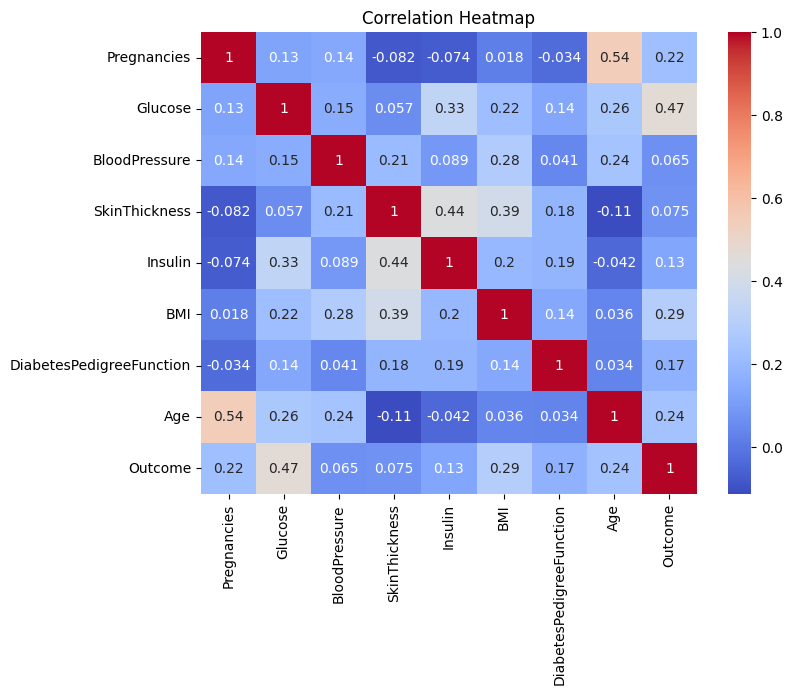

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

In [ ]:
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
print(corr)

In [ ]:
# Features (X) and Target (y)
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = df['Outcome']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y,random_state=42)

# Data Preprocessing:

#Feature scaling
scaler = StandardScaler()

# Fit the scaler on the training data and transform both train and test data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Data Balancing: Random Undersampling using RandomUnderSampler
undersampler = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)


In [ ]:
# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict with initial model
y_pred = model.predict(X_test)

In [ ]:
# Calculate and print initial model metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

print("Initial Model Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("AUC:", auc)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Initial Model Metrics:
Accuracy: 0.734375
Precision: 0.6481481481481481
Recall: 0.5223880597014925
F1-score: 0.5785123966942148
AUC: 0.6851940298507463
Confusion Matrix:
 [[106  19]
 [ 32  35]]


In [ ]:
# Define the hyperparameter grid to search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],              # Regularization type
    'solver': ['liblinear', 'saga']       # Solver algorithms
}

# Create and train the Logistic Regression model with RandomizedSearchCV
# n_iter controls the number of iterations within RandomizedSearchCV
random_search = RandomizedSearchCV(
    LogisticRegression(random_state=42, max_iter=1000),
    param_distributions=param_grid,
    n_iter=20,  # Set the desired number of iterations here
    cv=5,
    scoring='accuracy'
)
random_search.fit(X_train, y_train)

# Get the best model and its hyperparameters
best_model = random_search.best_estimator_
best_hyperparameters = best_model.get_params()

print(f"Best Accuracy: {random_search.best_score_:.4f}")
print(f"Best Hyperparameters: {best_hyperparameters}")

# Use the best model for prediction
y_pred_tuned = best_model.predict(X_test)

Best Accuracy: 0.7848
Best Hyperparameters: {'C': 0.1, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l1', 'random_state': 42, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [ ]:
# Use best estimator for prediction
best_model = random_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)

# Calculate and print tuned model metrics
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
precision_tuned = precision_score(y_test, y_pred_tuned)
recall_tuned = recall_score(y_test, y_pred_tuned)
f1_tuned = f1_score(y_test, y_pred_tuned)
auc_tuned = roc_auc_score(y_test, y_pred_tuned)

print("\nTuned Model Metrics:")
print("Accuracy:", accuracy_tuned)
print("Precision:", precision_tuned)
print("Recall:", recall_tuned)
print("F1-score:", f1_tuned)
print("AUC:", auc_tuned)

cm_tuned = confusion_matrix(y_test, y_pred_tuned)
print("Confusion Matrix (Tuned):\n", cm_tuned)


num_diabetes_predictions = sum(y_pred_tuned == 1)
num_no_diabetes_predictions = sum(y_pred_tuned == 0)

print("Number of instances predicted to have diabetes:", num_diabetes_predictions)
print("Number of instances predicted not to have diabetes:", num_no_diabetes_predictions)


Tuned Model Metrics:
Accuracy: 0.7135416666666666
Precision: 0.6111111111111112
Recall: 0.4925373134328358
F1-score: 0.5454545454545454
AUC: 0.6622686567164179
Confusion Matrix (Tuned):
 [[104  21]
 [ 34  33]]
Number of instances predicted to have diabetes: 54
Number of instances predicted not to have diabetes: 138


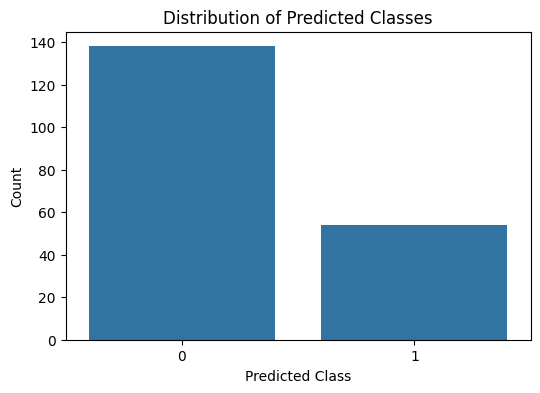

In [ ]:
#The predicted outcomes after hyperparameter tuning for Logistic Regression

plt.figure(figsize=(6, 4))
sns.countplot(x=y_pred_tuned)
plt.title("Distribution of Predicted Classes")
plt.xlabel("Predicted Class")
plt.ylabel("Count")
plt.show()

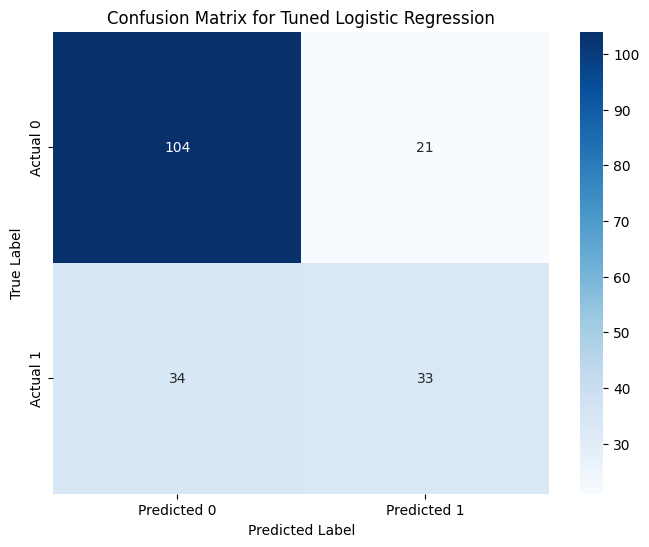

In [ ]:
# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_tuned, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.title("Confusion Matrix for Tuned Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

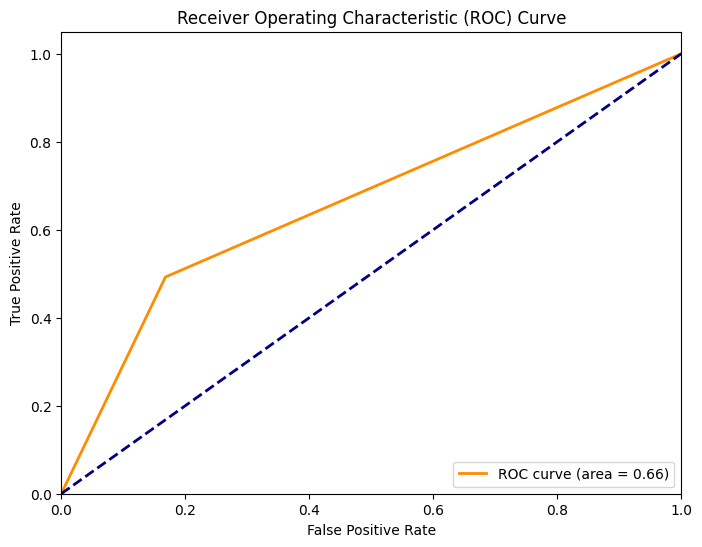

In [ ]:
from sklearn.metrics import roc_curve, auc

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_tuned)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)  # random_state for reproducibility

# Train the model on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_classifier.predict(X_test)

#Evaluate the model
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)
rf_auc = roc_auc_score(y_test, y_pred_rf)

print("Initial Model Metrics:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1-score:", rf_f1)
print("AUC:", rf_auc)

rf_cm = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:\n", rf_cm)


Initial Model Metrics:
Accuracy: 0.75
Precision: 0.6727272727272727
Recall: 0.5522388059701493
F1-score: 0.6065573770491803
AUC: 0.7041194029850747
Confusion Matrix:
 [[107  18]
 [ 30  37]]


In [ ]:
#feature importances
feature_importances = rf_classifier.feature_importances_

# Getting the feature names
feature_names = X.columns

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importance
print("Feature Importance:")
print(feature_importance_df)

Feature Importance:
                    Feature  Importance
1                   Glucose    0.279030
5                       BMI    0.159337
7                       Age    0.124691
6  DiabetesPedigreeFunction    0.123345
0               Pregnancies    0.090802
2             BloodPressure    0.084731
4                   Insulin    0.071515
3             SkinThickness    0.066548


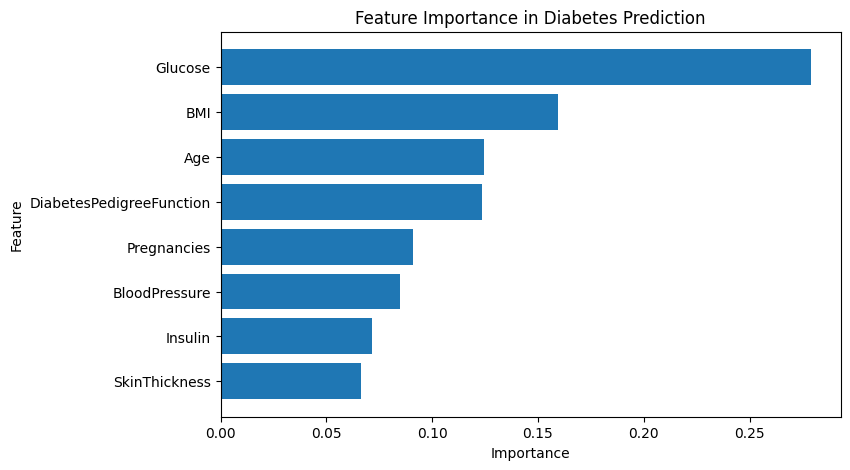

In [ ]:
#Plot feature importances
plt.figure(figsize=(8, 5))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in Diabetes Prediction")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.savefig('feature_importance.jpeg')
plt.show()

In [ ]:
# Create a RandomForestClassifier model
rf_classifier = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Number of iterations for hyperparameter tuning
num_iterations = 20

# Store the best scores and models from each iteration
best_rf_scores = []
best_rf_models = []

# Loop for hyperparameter tuning
for i in range(num_iterations):
    print(f"Iteration {i + 1} of {num_iterations}")

    # Create and train the Random Forest model with RandomizedSearchCV
    random_search = RandomizedSearchCV(
        RandomForestClassifier(random_state=i),
        param_distributions=param_grid,
        n_iter=10,
        cv=5,
        scoring='accuracy'
    )
    random_search.fit(X_train, y_train)

    # Store the best score and model
    best_rf_scores.append(random_search.best_score_)
    best_rf_models.append(random_search.best_estimator_)
    print(f"Iteration {i + 1}: Best Accuracy = {random_search.best_score_:.4f}")

# Find the best model based on the highest score
best_rf_model_index = best_rf_scores.index(max(best_rf_scores))
best_rf_model = best_rf_models[best_rf_model_index]

print(f"\nBest Model (Iteration {best_rf_model_index + 1}): Accuracy = {best_rf_scores[best_rf_model_index]:.4f}")
print(f"Best Hyperparameters: {best_rf_model.get_params()}")

# Use the best model for prediction
y_pred_rf_tuned = best_rf_model.predict(X_test)

Iteration 1 of 20
Iteration 1: Best Accuracy = 0.7709
Iteration 2 of 20
Iteration 2: Best Accuracy = 0.7691
Iteration 3 of 20
Iteration 3: Best Accuracy = 0.7726
Iteration 4 of 20
Iteration 4: Best Accuracy = 0.7743
Iteration 5 of 20
Iteration 5: Best Accuracy = 0.7726
Iteration 6 of 20
Iteration 6: Best Accuracy = 0.7743
Iteration 7 of 20
Iteration 7: Best Accuracy = 0.7709
Iteration 8 of 20
Iteration 8: Best Accuracy = 0.7640
Iteration 9 of 20
Iteration 9: Best Accuracy = 0.7674
Iteration 10 of 20
Iteration 10: Best Accuracy = 0.7657
Iteration 11 of 20
Iteration 11: Best Accuracy = 0.7674
Iteration 12 of 20
Iteration 12: Best Accuracy = 0.7709
Iteration 13 of 20
Iteration 13: Best Accuracy = 0.7691
Iteration 14 of 20
Iteration 14: Best Accuracy = 0.7622
Iteration 15 of 20
Iteration 15: Best Accuracy = 0.7639
Iteration 16 of 20
Iteration 16: Best Accuracy = 0.7708
Iteration 17 of 20
Iteration 17: Best Accuracy = 0.7674
Iteration 18 of 20
Iteration 18: Best Accuracy = 0.7692
Iteration 

In [ ]:
# Calculate and print tuned model metrics
accuracy_rf_tuned = accuracy_score(y_test, y_pred_rf_tuned)
precision_rf_tuned = precision_score(y_test, y_pred_rf_tuned)
recall_rf_tuned = recall_score(y_test, y_pred_rf_tuned)
f1_rf_tuned = f1_score(y_test, y_pred_rf_tuned)
auc_rf_tuned = roc_auc_score(y_test, y_pred_rf_tuned)

print("\nTuned Model Metrics:")
print("Accuracy:", accuracy_rf_tuned)
print("Precision:", precision_rf_tuned)
print("Recall:", recall_rf_tuned)
print("F1-score:", f1_rf_tuned)
print("AUC:", auc_rf_tuned)

cm_rf_tuned = confusion_matrix(y_test, y_pred_rf_tuned)
print("Confusion Matrix (Tuned):\n", cm_rf_tuned)

num_diabetes_predictions_rf= sum(y_pred_rf_tuned == 1)
num_no_diabetes_predictions_rf = sum(y_pred_rf_tuned == 0)

print("Number of instances predicted to have diabetes:", num_diabetes_predictions_rf)
print("Number of instances predicted not to have diabetes:", num_no_diabetes_predictions_rf)


Tuned Model Metrics:
Accuracy: 0.7552083333333334
Precision: 0.6851851851851852
Recall: 0.5522388059701493
F1-score: 0.6115702479338843
AUC: 0.7081194029850746
Confusion Matrix (Tuned):
 [[108  17]
 [ 30  37]]
Number of instances predicted to have diabetes: 54
Number of instances predicted not to have diabetes: 138


# **Comparision of the models based on these metrics**:

Accuracy: The Random Forest (0.76) performed better than Logistic Regression (0.71)in terms of accuracy.
Precision: Random Forest has higher precision  for both classes compared to Logistic Regression.
Recall: Random Forest has higher recall for both classes compared to Logistic Regression.
F1-score: Random Forest has a higher F1-score for both classes compared to Logistic Regression, suggesting a better balance between precision and recall.
AUC: Random forest has higher AUC of 0.71 compared to Logistic regrssion (0.66). A higher AUC indicates better discrimination between classes.

***Overall Comparison***

Based on these evaluation metrics, the Random Forest model appears to outperform the Logistic Regression model in terms of accuracy, precision, recall, and F1-score. This suggests that Random Forest is better at classifying instances in the dataset.

**Understanding Feature Importance**

Feature importance scores reflect how much each feature contributes to the model's predictive power. Higher scores indicate stronger influence on the model's decisions. In this analysis, the Random Forest model assigned importance scores to each of the eight features used to predict diabetes.

**Key Insights**

**Glucose** is the Most Important Feature: It received the highest importance score, indicating its strong predictive power. This aligns with medical understanding, as blood glucose levels are a primary indicator of diabetes.

**BMI and Age** are Also Important: These features received the second and third highest importance scores, respectively. BMI is a measure of body fat and is linked to diabetes risk. Age is also a known risk factor, as the likelihood of developing diabetes increases with age.

DiabetesPedigreeFunction and Pregnancies Have Moderate Importance: This feature represents a family history of diabetes and carries a moderate level of predictive power. Pregnancies, particularly gestational diabetes, can also increase the risk of developing type 2 diabetes later in life.

BloodPressure, SkinThickness, and Insulin Have Lower Importance: While these features contribute to the model, their influence is relatively lower compared to the top features. This suggests that these factors might be less direct indicators of diabetes risk in this dataset.

Overall Interpretation

The feature importance results highlight the key factors that drive the model's predictions:

Glucose is the primary predictor, reflecting its central role in diabetes.
BMI and Age are also crucial, representing lifestyle and demographic factors.
Family history (DiabetesPedigreeFunction) and pregnancy history have a moderate influence.
Blood pressure, skin thickness, and insulin levels provide additional but less impactful information.


**Practical Implications**

These results can guide healthcare professionals in prioritising risk factors during diabetes screening and prevention efforts.
By focusing on the most influential features, interventions can be targeted more effectively.
The insights gained from feature importance analysis can help improve the accuracy and interpretability of diabetes prediction models.